Emular el estudio hecho con HDBSCAN en la web que hemos tratado y, para ese mismo dataset, hace un estudio por las K-Means, empleando la técnica del codo para hallar K.

https://rubialesalberto.medium.com/clustering-con-dbscan-y-hdbscan-con-python-y-sus-hiperpar%C3%A1metros-en-sklearn-8728283b96ac

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [3]:
#Cargamos el dataset
df_cluster= np.load('/content/drive/MyDrive/0719 - Modelos No Supervisados/clusterable_data.npy')

In [4]:
df_cluster

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [5]:
df_cluster =  pd.DataFrame((df_cluster), columns = ['x','y'])

In [6]:
df_cluster.head()

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


Realizamos el algoritmo con DBSCAN:

In [7]:
#Instanciamos
dbscan = DBSCAN(eps=0.033,
               min_samples=22,
               algorithm='brute',
               p=0.9)

In [8]:
#Entrenamos y predecimos
preds = dbscan.fit_predict(df_cluster)

In [9]:
#Métricas de Clustering
silhouette_score(df_cluster, preds)
#nuesttro sihouette score (coeficiente de silueta) es malo

0.19592842860298926

In [10]:
#Nuestro harabasz score es bueno
calinski_harabasz_score(df_cluster, preds)

360.0211550733057

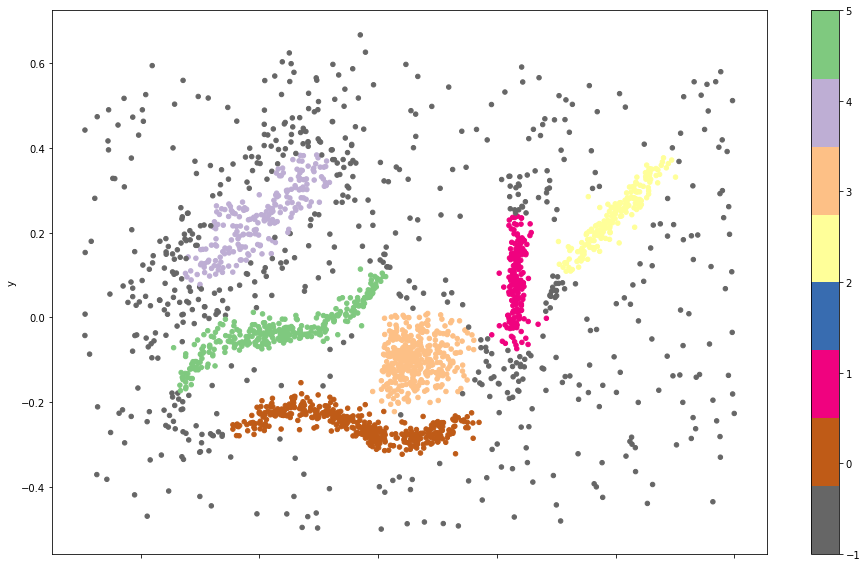

In [11]:
#Hacemos un plot de los resultados
df_cluster.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))

HDBSCAN como se puede entender por su nombre, es bastante parecido a DBSCAN. El único problema es que no se encuentra en la librería Scikit-Learn, por lo que deberemos instalar su propia librería, para ello ejecutamos el siguiente comando.



In [12]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342133 sha256=3b07aae06e1276deaff3f0d1cc81fd5fc05b0fa60c4adabcd0ca6753c38d60b9
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


Aplicamos a este dataset el modelo K-Medias

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [14]:
# Como podemos ver, la escala de las distintas variables son distintas, así que vamos a corregirlo
# para evitar problemas a la hora de calcular distancias

standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(df_cluster)
scaled_x_df = pd.DataFrame(scaled_x,index=df_cluster.index, columns = df_cluster.columns)
scaled_x_df.head()

,x,y
0,-0.583468,-1.063947
1,-1.007285,-1.169063
2,0.471527,-1.260390
3,-0.766814,-1.035090
4,-0.836256,-0.985650


In [15]:
# Vamos a crear nuesto modelo
kmeans = KMeans(n_clusters=2, random_state = 123)

In [16]:
# Vamos a entrenar nuestro modelo
kmeans.fit(scaled_x_df)

KMeans(n_clusters=2, random_state=123)

In [17]:
# Vamos a mostrar a qué cluster el modelo asigna a cada fila de nuestros datos
clusters_kmeans = kmeans.predict(scaled_x_df)
clusters_kmeans

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [18]:
# definimos una nueva lista que va a tener el error de asignación de los clusters para cada valor de K
# WCSS es la posición que ocupa en el error el número de clusters, es decir, el número de grupitos que quiero generar

wcss = []

# Probamos diferentes valores de K 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(scaled_x_df)
  wcss.append(kmeans.inertia_)

In [19]:
wcss

[4617.999999999996,
 2821.091405741308,
 1607.5529138055422,
 1166.1263864335049,
 968.9705006354518,
 817.0017614927295,
 691.3532334423246,
 600.9483145524191,
 519.2907561766073,
 463.61160282998486]

In [20]:
#%matplotlib notebook
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


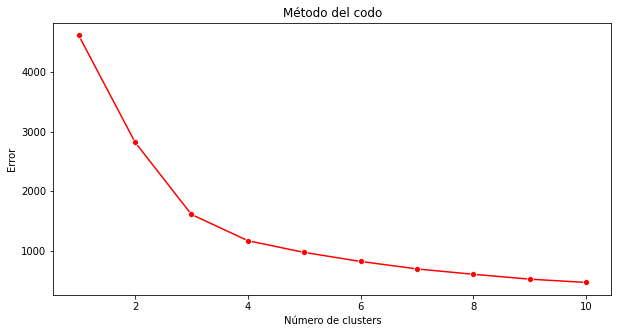

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Error')
plt.show()